# Distracted Driver MultiAction Classification

In [1]:
import os
os.getcwd()

'D:\\DLProject4'

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [6]:
import cv2

In [7]:
len(os.listdir('./state-farm-distracted-driver-detection/imgs/test'))

79726

In [8]:
print(len(os.listdir('./state-farm-distracted-driver-detection/imgs/train/c0')))

2489


In [18]:
print(len(os.listdir('./state-farm-distracted-driver-detection/imgs/train/c1')))
print(len(os.listdir('./state-farm-distracted-driver-detection/imgs/train/c2')))
print(len(os.listdir('./state-farm-distracted-driver-detection/imgs/train/c3')))
print(len(os.listdir('./state-farm-distracted-driver-detection/imgs/train/c4')))
print(len(os.listdir('./state-farm-distracted-driver-detection/imgs/train/c5')))
print(len(os.listdir('./state-farm-distracted-driver-detection/imgs/train/c6')))
print(len(os.listdir('./state-farm-distracted-driver-detection/imgs/train/c7')))
print(len(os.listdir('./state-farm-distracted-driver-detection/imgs/train/c8')))
print(len(os.listdir('./state-farm-distracted-driver-detection/imgs/train/c9')))

2267
2317
2346
2326
2312
2325
2002
1911
2129


In [19]:
# model=Sequential()
# model.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64,(5,5),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(1024,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(200,activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(10,activation="relu"))

In [20]:
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,validation_split=0.20)

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

## Image Generators

In [12]:
train_generator = train_datagen.flow_from_directory(
        './state-farm-distracted-driver-detection/imgs/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training'
        )

Found 17943 images belonging to 10 classes.


In [13]:
validation_generator = train_datagen.flow_from_directory(
        './state-farm-distracted-driver-detection/imgs/train',
         target_size=(64, 64),
         batch_size=32,
        class_mode='categorical',
         subset='validation'
        )

Found 4481 images belonging to 10 classes.


In [24]:
test_generator = test_datagen.flow_from_directory(
    './state-farm-distracted-driver-detection/imgs/Test1',
        target_size=(64, 64),
        batch_size=2,
        shuffle=False,
        class_mode='categorical',classes=['Test1']
    
)

Found 79726 images belonging to 1 classes.


## Layers

In [14]:
mod = Sequential()
mod.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(64,64,3)))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))

mod.add(Conv2D(64,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))

mod.add(Conv2D(128,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.5))

mod.add(Flatten())
mod.add(Dense(units = 512,activation='relu'))
mod.add(BatchNormalization())
#mod.add(Dropout(0.5))

mod.add(Dense(units = 128,activation='relu'))
#mod.add(Dropout(0.25))

mod.add(Dense(10,activation='softmax'))

In [15]:
mod.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Model Fit

In [16]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [18]:
model2=mod.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/10
560/560 [==============================] - 1688s 3s/step - loss: 1.3117 - accuracy: 0.5426 - val_loss: 0.7747 - val_accuracy: 0.7353
Epoch 2/10
560/560 [==============================] - 404s 721ms/step - loss: 0.5586 - accuracy: 0.8103 - val_loss: 0.4706 - val_accuracy: 0.8513
Epoch 3/10
560/560 [==============================] - 427s 763ms/step - loss: 0.4032 - accuracy: 0.8665 - val_loss: 0.2967 - val_accuracy: 0.9056
Epoch 4/10
560/560 [==============================] - 431s 770ms/step - loss: 0.3084 - accuracy: 0.8976 - val_loss: 0.2711 - val_accuracy: 0.9134
Epoch 5/10
560/560 [==============================] - 437s 781ms/step - loss: 0.2480 - accuracy: 0.9195 - val_loss: 0.1892 - val_accuracy: 0.9424
Epoch 6/10
560/560 [==============================] - 436s 779ms/step - loss: 0.2117 - accuracy: 0.9310 - val_loss: 0.1311 - val_accuracy: 0.9629
Epoch 7/10
560/560 [==============================] - 597s 1s/step - loss: 0.2084 - accuracy: 0.9310 - val_loss: 0.2184 - val_

In [19]:
%matplotlib inline 
import matplotlib.pyplot as plt

## Accuracy & Loss Plots

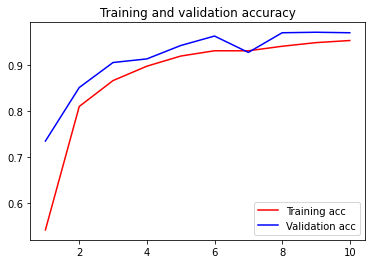

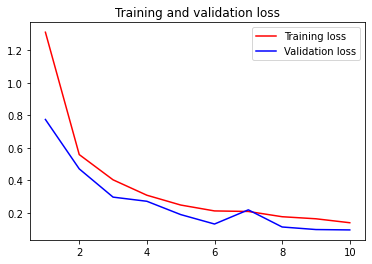

In [20]:
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']
loss = model2.history['loss']
val_loss = model2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
#plotting train and validation losses
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Predict  Generator

In [25]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=mod.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

39863/39863 [==============================] - 1322s 33ms/step


In [26]:
pred

array([[1.4523935e-08, 1.7907429e-11, 1.8249258e-07, ..., 8.1584943e-09,
        7.8995548e-09, 1.6977764e-09],
       [3.0882558e-05, 2.4337189e-07, 4.3895812e-05, ..., 3.2097055e-04,
        4.0579336e-05, 3.8685273e-05],
       [9.7548467e-01, 2.1596238e-02, 4.3818945e-06, ..., 7.0095069e-07,
        2.6834387e-06, 1.5807312e-03],
       ...,
       [9.5627987e-04, 2.1933722e-03, 6.9500245e-05, ..., 3.0129042e-06,
        1.0318067e-02, 1.0475981e-03],
       [3.0431417e-09, 2.0264390e-09, 9.8190951e-01, ..., 2.1169612e-08,
        1.0124691e-06, 3.1228931e-09],
       [7.3888629e-08, 1.1448166e-09, 1.1747418e-10, ..., 1.8521455e-07,
        1.6564923e-06, 1.4586227e-04]], dtype=float32)

In [27]:
len(pred)

79726

In [28]:
labels_test_predictions = pd.DataFrame(pred)
labels_test_predictions

,0,1,2,3,4,5,6,7,8,9
0,1.452393e-08,1.790743e-11,1.824926e-07,7.931320e-07,6.234226e-06,9.999927e-01,2.548325e-08,8.158494e-09,7.899555e-09,1.697776e-09
1,3.088256e-05,2.433719e-07,4.389581e-05,9.577788e-06,7.308569e-06,9.994753e-01,3.261042e-05,3.209705e-04,4.057934e-05,3.868527e-05
2,9.754847e-01,2.159624e-02,4.381895e-06,1.263323e-03,6.636329e-05,1.164965e-07,8.224915e-07,7.009507e-07,2.683439e-06,1.580731e-03
3,2.820949e-03,8.962834e-04,5.368001e-02,2.088523e-05,1.546885e-02,5.446452e-02,1.024514e-01,1.329828e-05,6.853583e-01,8.482552e-02
4,2.725124e-02,1.494605e-07,5.326558e-05,8.266088e-01,1.147808e-01,1.761292e-04,2.172256e-04,1.603215e-02,1.452290e-02,3.573550e-04
...,...,...,...,...,...,...,...,...,...,...
79721,2.659321e-03,9.932365e-01,1.937306e-04,1.367027e-05,6.689672e-06,9.252058e-07,8.056751e-04,2.060951e-03,6.168651e-04,4.056710e-04
79722,1.186416e-02,1.164710e-01,1.501644e-04,8.678921e-01,2.150866e-04,9.703088e-06,1.746280e-04,6.810389e-07,4.470389e-05,3.177736e-03
79723,9.562799e-04,2.193372e-03,6.950025e-05,1.641538e-03,9.610271e-01,1.916249e-04,2.255182e-02,3.012904e-06,1.031807e-02,1.047598e-03
79724,3.043142e-09,2.026439e-09,9.819095e-01,3.351223e-10,3.665455e-07,1.758701e-09,1.808904e-02,2.116961e-08,1.012469e-06,3.122893e-09


In [29]:
labels_test_predictions.columns = ["c"+str(x) for x in labels_test_predictions.columns]

In [30]:
labels_test_predictions.insert(0,"img",[x.split("\\")[1] for x in test_generator.filenames])

In [31]:
labels_test_predictions=labels_test_predictions.round(2)

In [32]:
labels_test_predictions.to_csv('Distracted_Driver_MultiAction_Classification.csv',index=False)

## Model Save

In [33]:
mod.save_weights('./driverdistraction_lr_weights.h5', overwrite=True)
mod.save('./driverdistraction.h5')